## 1.. What is Feather & how to read data from data !
        Feather is a binary file format that is used for storing data ..


        Feather is a fast, lightweight, and easy-to-use binary file format for storing data 
        It shows high I/O speed, doesn’t take too much memory on the disk and doesn’t need any unpacking 
        when loaded back into RAM.
        
        Feather has max I/O speed
        https://arrow.apache.org/docs/python/feather.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## use warnings package to get rid of any warnings ..
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
### In order to work with feather files , do install pyarrow package ..
## !pip install pyarrow


In [2]:
!pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
all_data = pd.read_feather(r"data/Sales_data.ftr")

In [3]:
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
'''

The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost ,
purchase address, etc

'''

##### Data cleaning and formatting

In [4]:
all_data.isnull().sum() ## checking out total missing values we have 

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
### since there 545 observations where entire row have missing value , you can drop these 545 rows..

all_data = all_data.dropna(how="all")

In [6]:
all_data.sort_values('Order Date',ascending=False) #some results with text in "order Date"

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
107295,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
52769,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
46967,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
47181,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
76061,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"
76708,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
76054,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
74701,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"


In [7]:
all_data=all_data[all_data['Order Date']!='Order Date'] #drop all nonvalid rows

In [8]:
all_data.sort_values('Order Date',ascending=False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
32511,297674,AAA Batteries (4-pack),1,2.99,12/31/19 23:53,"425 Lake St, Portland, OR 97035"
45172,309773,AAA Batteries (4-pack),1,2.99,12/31/19 23:52,"60 Hickory St, Los Angeles, CA 90001"
52781,317048,AAA Batteries (4-pack),2,2.99,12/31/19 23:45,"743 Adams St, San Francisco, CA 94016"
32308,297481,AA Batteries (4-pack),1,3.84,12/31/19 23:42,"82 Hill St, Dallas, TX 75001"
33264,298406,AAA Batteries (4-pack),2,2.99,12/31/19 23:42,"30 Elm St, San Francisco, CA 94016"
...,...,...,...,...,...,...
76061,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"
76708,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
76054,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
74701,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"


In [9]:
all_data.isnull().sum() #no null values

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
### check whether you have duplicate rows or not !

In [10]:
all_data.duplicated() #check for duplicates

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 185950, dtype: bool

In [11]:
all_data[all_data.duplicated()] ## total 618 duplicate rows ..

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
3805,180207,Apple Airpods Headphones,1,150,04/13/19 01:46,"196 7th St, Los Angeles, CA 90001"
4196,180576,Lightning Charging Cable,1,14.95,04/18/19 17:23,"431 Park St, Dallas, TX 75001"
...,...,...,...,...,...,...
184940,257530,USB-C Charging Cable,1,11.95,09/03/19 11:13,"192 Johnson St, San Francisco, CA 94016"
186173,258715,Lightning Charging Cable,1,14.95,09/15/19 16:50,"550 10th St, Portland, OR 97035"
186508,259035,27in FHD Monitor,1,149.99,09/29/19 13:52,"327 Lake St, San Francisco, CA 94016"
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [12]:
all_data = all_data.drop_duplicates() ## Dropping all the duplicate rows ..

In [13]:
all_data.shape

(185686, 6)

In [14]:
all_data[all_data.duplicated()] #verify no duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


## 2.. Which is the best month for sale ?
    What month has the most sales?

In [15]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


##### add month col

In [16]:
all_data['Order Date'][0]

'04/19/19 08:46'

In [17]:
all_data[all_data['Order Date'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [18]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'],  format='%m/%d/%y %H:%M') #convert 'Order Date' to datetime 
all_data['Price Each'] =all_data['Price Each'].astype(float) #convert column to float
all_data['Quantity Ordered'] =all_data['Quantity Ordered'].astype(float) #convert column to float

In [19]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [21]:
all_data['Order Date'] 

0        2019-04-19 08:46:00
2        2019-04-07 22:30:00
3        2019-04-12 14:38:00
4        2019-04-12 14:38:00
5        2019-04-30 09:27:00
                 ...        
186845   2019-09-17 20:56:00
186846   2019-09-01 16:00:00
186847   2019-09-23 07:39:00
186848   2019-09-19 17:30:00
186849   2019-09-30 00:18:00
Name: Order Date, Length: 185686, dtype: datetime64[ns]

In [22]:
all_data['Month'] = all_data['Order Date'].dt.month.astype(int) #get month as int from datetime
all_data['Total Value']=all_data['Price Each']*all_data['Quantity Ordered'] #create column for total line value

In [23]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Value
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


In [24]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Total Value                float64
dtype: object

In [25]:
all_data['Month'].unique() ## checking unique months 

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10])

In [26]:
filter1 = all_data['Month'] == 'Order Date' #create filter
all_data[~filter1] 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Value
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


In [27]:
all_data = all_data[~filter1] ## excluding all rows which have entry as "Order Date" Order Date field ..

In [28]:
all_data.shape

(185686, 8)

In [29]:
all_data['Month'] = all_data['Month'].astype(int)

In [30]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Total Value                float64
dtype: object

In [34]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(float)
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Order ID'] = all_data['Order ID'].astype(float)

In [35]:
all_data.dtypes

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Total Value                float64
dtype: object

In [36]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each'] ## creating sales feature

In [37]:
all_data['sales']

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: sales, Length: 185686, dtype: float64

In [38]:
all_data.groupby(['Month'])['sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<Axes: xlabel='Month'>

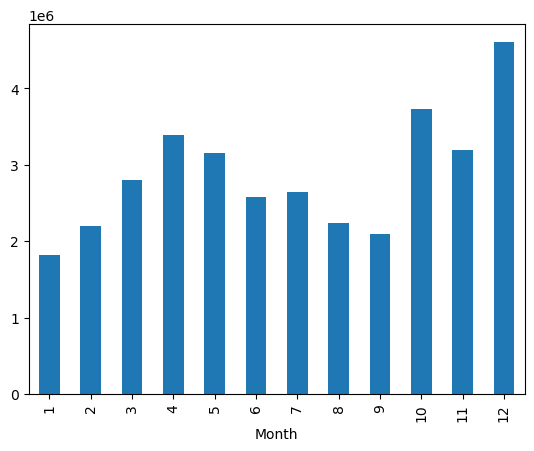

In [39]:
all_data.groupby(['Month'])['sales'].sum().plot(kind='bar')

In [ ]:
'''

->> y-axis scale : 1e^6

E stands for exponential , in short it is *10^

So, 1e6 or 1e^6 OR 1 exponent 6 is the same as 1*10^6 which is same as 1,000,000


Inference : December is the best month of sales ..

'''

## 3.. Which city has max order ? 

In [40]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Value,sales
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,99.99


In [41]:
all_data['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [42]:
all_data['Purchase Address'][0].split(',')[1].strip() ## extracting city from "Purchase Address"

'Dallas'

In [46]:
all_data['city'] = all_data['Purchase Address'].str.split(',').str.get(1).astype(str)

In [47]:
all_data['city']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, Length: 185686, dtype: object

In [48]:
pd.value_counts(all_data['city']) ## frequency table..

city
 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: count, dtype: int64

<Axes: ylabel='count'>

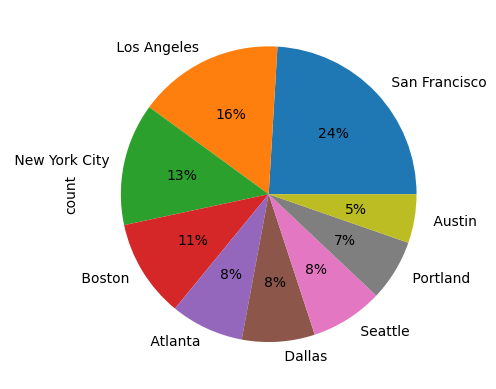

In [49]:
pd.value_counts(all_data['city']).plot(kind='pie' , autopct = '%1.0f%%') ## Pandas pie chart..

In [ ]:
'''

Inference : New York , Los Angeles , San Francisco are the Top 3 cities with the most orders


'''

## 4.. What product sold the most &  Why?

In [ ]:
'''
price & reviews??
'''

In [50]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Total Value', 'sales', 'city'],
      dtype='object')

In [73]:
count_df = all_data.groupby(['Product']).agg({'Quantity Ordered':'sum' , 'Price Each':'mean'})

In [ ]:
'''
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.SeriesGroupBy.agg.html#pandas.core.groupby.SeriesGroupBy.agg
'''

In [71]:
count_df = count_df.reset_index()

In [72]:
count_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126.0,109.99
1,27in 4K Gaming Monitor,6239.0,389.99
2,27in FHD Monitor,7541.0,149.99
3,34in Ultrawide Monitor,6192.0,379.99
4,AA Batteries (4-pack),27615.0,3.84
5,AAA Batteries (4-pack),30986.0,2.99
6,Apple Airpods Headphones,15637.0,150.00
7,Bose SoundSport Headphones,13430.0,99.99
8,Flatscreen TV,4813.0,300.00
9,Google Phone,5529.0,600.00


In [ ]:
'''
When we say twin axes, it means a figure can have dual x or y-axes..
plt.twinx() : function which is used to create a twin Axes that are sharing the x-axis..

Similarly, the function twiny() is used to create a second x axis in your figure, which means twiny() sharing the y-axis..  
'''

In [59]:
products = count_df.index.values #need to use .index.values to get index values

Text(0, 0.5, 'Avg price of product')

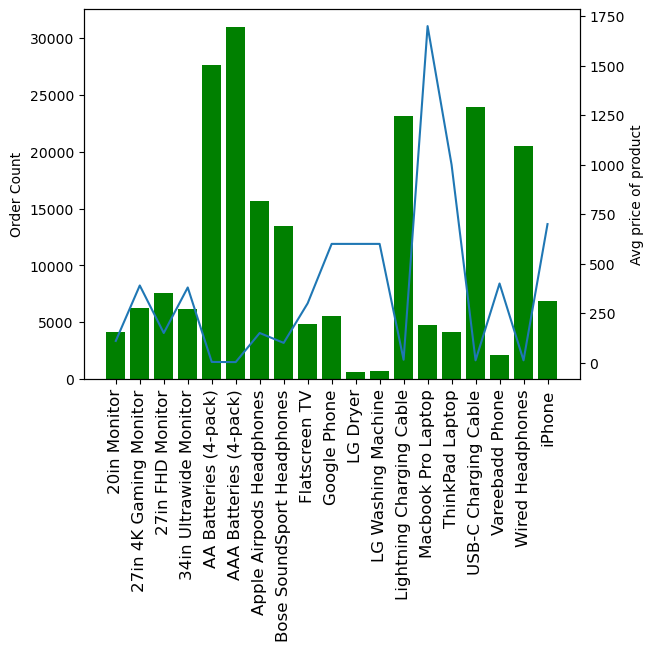

In [89]:
fig , ax1 = plt.subplots()

ax2 = ax1.twinx() ## as X-axis is same for both plots , ie we are sharing x-axis , ie we have to use ax2 = ax1.twinx()
ax1.bar(count_df.index , count_df['Quantity Ordered'] , color='g') #Need to use .index 
ax2.plot(count_df.index , count_df['Price Each'] )
ax1.set_xticklabels(products , rotation=90, fontsize=12)

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')

In [ ]:
'''

Insights : 

The top selling product is 'AAA Batteries'. 
The top selling products seems to have a correlation with the price of the product. 
The cheaper the product higher the quantity ordered and vice versa.



'''

## 5.. Understanding Trend of the most sold product ? 

In [90]:
all_data['Product'].value_counts()[0:5].index   ## Top 5 most sold products ..

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [101]:
most_sold_product = all_data['Product'].value_counts()[0:5].index #create index of top 5 products, ordered by valuecounts
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html

In [99]:
type(most_sold_product)

pandas.core.indexes.base.Index

In [94]:
all_data['Product'].isin(most_sold_product)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

In [96]:
most_sold_product_df = all_data[all_data['Product1'].isin(most_sold_product)]  ## data of Top 5 most sold products only ..
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html

In [88]:
most_sold_product_df.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco


In [ ]:
## Since we have learnt how to create frequency table or pivot table using crosstab() in zomato case- study , 
## lets learn how to do it using groupby + unstack()

In [102]:
most_sold_product_df.groupby(['Month' , 'Product']).size() #get number of row by month for each combination of month and product
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.size.html#pandas.core.groupby.DataFrameGroupBy.size

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [103]:
pivot = most_sold_product_df.groupby(['Month' , 'Product']).size().unstack() #pivot dataframe, based on groups
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack

In [104]:
pivot

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


<AxesSubplot:xlabel='Month'>

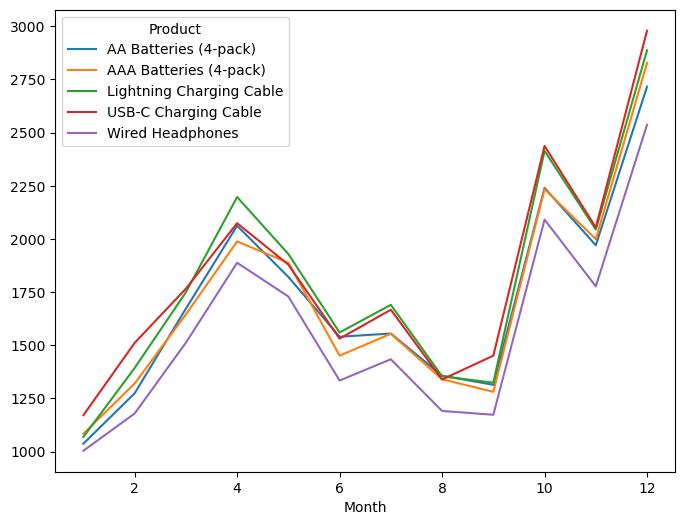

In [93]:
pivot.plot(figsize=(8,6))

In [ ]:
'''

Inference : Products have been sold more in Oct , Nov , Dec 


'''

## 6.. What products are most often sold together ?
        keep orders that have same order Id, are sold mostly together ..
        Approach : ie keep duplicated data 

In [95]:
all_data.columns 

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales', 'city'],
      dtype='object')

In [105]:
all_data['Order ID'] 

0         176558.0
2         176559.0
3         176560.0
4         176560.0
5         176561.0
            ...   
186845    259353.0
186846    259354.0
186847    259355.0
186848    259356.0
186849    259357.0
Name: Order ID, Length: 185686, dtype: float64

In [106]:
df_duplicated = all_data[all_data['Order ID'].duplicated(keep=False)] #keep = False: keep all duplicates

In [101]:
df_duplicated ## dataframe in which we have those Order Ids who have purchased more products !

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [110]:
dup_products = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product':'grouped_products'})

## for every Order-Id , collect all the products ..

In [111]:
dup_products

,Order ID,grouped_products
0,141275.0,"USB-C Charging Cable,Wired Headphones"
1,141290.0,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365.0,"Vareebadd Phone,Wired Headphones"
3,141384.0,"Google Phone,USB-C Charging Cable"
4,141450.0,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536.0,"Macbook Pro Laptop,Wired Headphones"
6875,319556.0,"Google Phone,Wired Headphones"
6876,319584.0,"iPhone,Wired Headphones"
6877,319596.0,"iPhone,Lightning Charging Cable"


In [112]:
dup_products_df = df_duplicated.merge(dup_products , how='left' , on='Order ID') ## merge dataframes 

In [109]:
dup_products_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [113]:
no_dup_df = dup_products_df.drop_duplicates(subset=['Order ID']) # lets drop out all duplicate Order ID

In [114]:
no_dup_df.shape

(6879, 11)

<Axes: ylabel='count'>

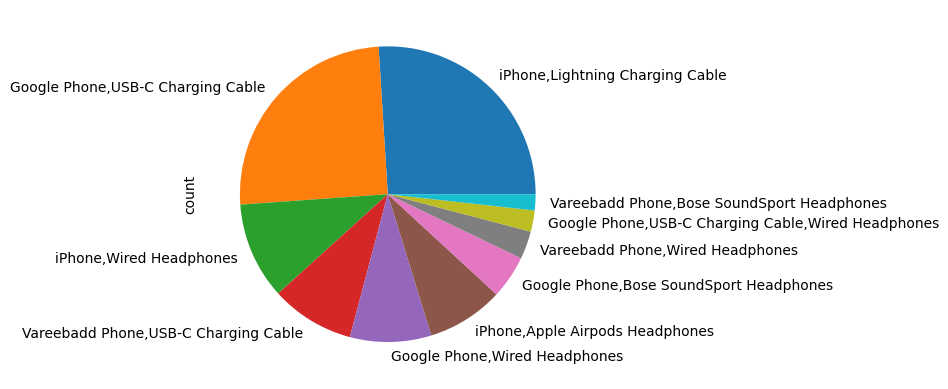

In [116]:
no_dup_df['grouped_products'].value_counts()[0:10].plot.pie() #get top  grouped combinations

In [ ]:
'''
As soon as someone buys a phone, recommend they buy a charging cable & headphones 
This is a very important insight when building a recommendation system ..
'''